In [1]:
#Inference #1: All drug programs had significant observations of tumor growth and an (essentially) 50/50 split between male and female mice.  

In [ ]:
#Inference #2: For Capomulin, there is a clear correlation between treatment regimen time and tumor volume - as treatment is administered, tumor volume decreases. 

In [ ]:
#Inference #3: There is a strong, positive association between mouse weight and tumor volume (0.84) for mice on the Capomulin regimen.

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [37]:
# Study data files
mouse_metadata_path = "Resources/Pymaceuticals_data_Mouse_metadata.csv"
study_results_path = "Resources/Pymaceuticals_data_Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#mouse_metadata
#study_results

In [38]:
# Combine the data into a single dataset
# Display the data table for preview
#mouse_metadata - 249 rows x 5 columns
#study_results - 1893 rows x 4 columns
merged_df=pd.merge(mouse_metadata, study_results, on = "Mouse ID", how="inner")
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [39]:
# Checking the number of mice - there are 249 nunique mice IDs.
mouse_count = merged_df["Mouse ID"].nunique()
#mouse_count

In [40]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Groupby mouseID returns 1108 rows with 249 unique mouse IDs; Groupby mouse ID AND timepoint returns 1893 rows;  Set_index by mouseID returns 1893 rows with 249 unique mouse IDs, # Doing duplicated by Mouse ID and Timepoint = mouse g989
#mouse_dup_df = merged_df.set_index("Mouse ID"),  #mouse_dup_df = merged_df.groupby(["Mouse ID", "Timepoint"]), #mouse_dup_df = merged_df[merged_df.duplicated(["Mouse ID"], keep=False)] 
# Doing duplicated by just Mouse ID = mouse k403 and this mouse has 5 different timepoints
mouse_dup_df = merged_df[merged_df.duplicated(["Mouse ID", "Timepoint"], keep=False)] 
mouse_dup_df
# Mouse g989 is a duplicate
# Optional: Get all the data for the duplicate mouse ID. 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [41]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
cleaned_df = merged_df.loc[merged_df["Mouse ID"] !="g989"]
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [42]:
# Checking the number of mice in the clean DataFrame. N = 248
mouse_count2 = cleaned_df["Mouse ID"].nunique()
#mouse_count2

In [43]:
# Generate summary stats table of mean, median, variance, standard deviation, and SEM of TUMOR VOLUME for EACH REGIMEN
    # Use GROUPBY and summary statistical methods to calculate the following properties of each drug regimen: 
        # mean, median, variance, standard deviation, and SEM of the tumor volume. 
        # Assemble the resulting series into a single summary dataframe.
#regimen_df = cleaned_df.groupby(["Drug Regimen", "Tumor Volume (mm3)"])
regimen_df = cleaned_df.groupby(["Drug Regimen"])
#regimen_df.head(1)
reg_mean = regimen_df["Tumor Volume (mm3)"].mean()
reg_med = regimen_df["Tumor Volume (mm3)"].median()
reg_std = regimen_df["Tumor Volume (mm3)"].std()
reg_sem = regimen_df["Tumor Volume (mm3)"].sem()
reg_var = regimen_df["Tumor Volume (mm3)"].var()
regimen_comp_df = pd.DataFrame({"Mean" : reg_mean, 
                              "Median" : reg_med,
                              "Variance" : reg_var,
                              "Std Dev" : reg_std,
                              "SEM" : reg_sem})

regimen_comp_df.head(10)
#regimen_df.describe()

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [44]:
# Generate summary stats table of mean, median, variance, standard deviation, and SEM of TUMOR VOLUME for EACH REGIMEN
    # Use the AGG method, produce the same summary statistics in a single line
regimen_df.agg({"Tumor Volume (mm3)" : ["mean", "median", "std", "sem", "var"]})
#WAIT - DID THIS JUST MESS UP MY ENTIRE REGIMEN_DF???????  NO - DOES NOT SEEM SO.

Tumor Volume (mm3)                                          
                           mean     median       std       sem        var
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  0.329346  24.947764
Ceftamin              52.591172  51.776157  6.268188  0.469821  39.290177
Infubinol             52.884795  51.820584  6.567243  0.492236  43.128684
Ketapril              55.235638  53.698743  8.279709  0.603860  68.553577
Naftisol              54.331565  52.509285  8.134708  0.596466  66.173479
Placebo               54.033581  52.288934  7.821003  0.581331  61.168083
Propriva              52.320930  50.446266  6.622085  0.544332  43.852013
Ramicane              40.216745  40.673236  4.846308  0.320955  23.486704
Stelasyn              54.233149  52.431737  7.710419  0.573111  59.450562
Zoniferol             53.236507  51.818479  6.966589  0.516398  48.533355

In [45]:
regimen_df.head(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
454,a203,Infubinol,Female,20,23,0,45.0,0
474,a262,Placebo,Female,17,29,0,45.0,0
484,a275,Ceftamin,Female,20,28,0,45.0,0
494,a366,Stelasyn,Female,16,29,0,45.0,0
501,a401,Zoniferol,Female,8,25,0,45.0,0
511,a457,Ketapril,Female,11,30,0,45.0,0
541,a699,Propriva,Female,5,28,0,45.0,0
558,a818,Naftisol,Female,12,28,0,45.0,0


In [46]:
#cleaned_df["Drug Regimen"].value_counts()

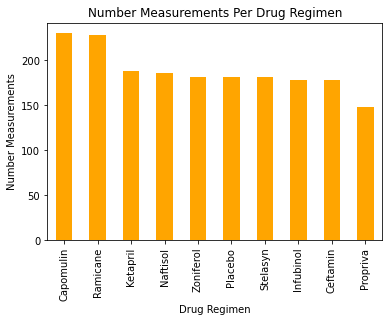

In [47]:
# Generate a bar plot USING PANDAS showing the total number of measurements taken on each drug regimen.
counts_bar1 = cleaned_df["Drug Regimen"].value_counts()
counts_bar1.plot(kind="bar", facecolor="Orange", title="Number Measurements Per Drug Regimen")
plt.ylabel("Number Measurements")
plt.xlabel("Drug Regimen")
plt.show()

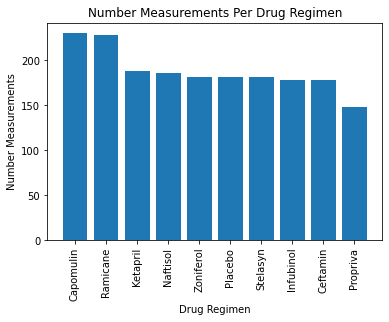

In [48]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot USING MATPLOT LIB.
counts_bar2 = cleaned_df["Drug Regimen"].value_counts()
plt.bar(counts_bar2.index.values, counts_bar2.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Number Measurements")
plt.title("Number Measurements Per Drug Regimen")
plt.xticks(rotation=90)
plt.show()

In [49]:
cleaned_df["Sex"].value_counts()

Male      958
Female    922
Name: Sex, dtype: int64

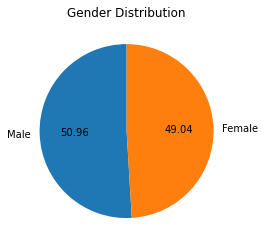

In [50]:
# Generate a PANDAS pie plot showing the distribution of female versus male mice 
counts_pie = cleaned_df["Sex"].value_counts()
labels = ["Male" , "Female"]
counts_pie.plot(kind="pie",title="Gender Distribution", labels=labels, autopct='%.2f', startangle=90)
plt.ylabel('')
plt.show()

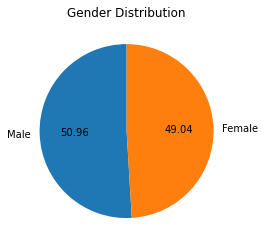

In [51]:
# Generate a MPL pie plot showing the distribution of female versus male mice
counts_pieMPL=cleaned_df["Sex"].value_counts()
labels = ["Male" , "Female"]
plt.pie(counts_pieMPL, labels = labels ,autopct='%.2f', startangle=90)
plt.title("Gender Distribution")
plt.show()

In [52]:
# Calculate the final tumor volume of each mouse across these four treatment regimens:  Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_tp=cleaned_df.groupby(["Mouse ID"]) ["Timepoint"].max()
last_tp_df = pd.DataFrame(last_tp)
last_tp_df.head()

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30


In [53]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(cleaned_df, last_tp_df, on = ("Mouse ID", "Timepoint"), how = "inner")
#merged_df["Timepoint_y"].unique()
merged_df = merged_df.rename(columns={"Timepoint": "Max_Timepoint"})
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Max_Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [54]:
# Put treatments into a list for a for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

In [55]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

In [56]:
# Calculate the IQR and quantitatively determine if there are any potential outliers:
     # Locate the rows which contain mice on each drug and get the tumor volumes
     # add subset 
     # Determine outliers using upper and lower bounds
for drug in treatments: 
    drug_df = merged_df.loc[(merged_df["Drug Regimen"] == drug)]
    new_var = drug_df["Tumor Volume (mm3)"]
    tumor_vol.append(new_var)
    quartiles = new_var.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(drug)
    print(f"Lower quartile: {round(lowerq,2)}")
    print(f"Upper quartile: {round(upperq,2)}")
    print(f"Interquartile: {round(iqr,2)}")
    print(f"Median: {round(quartiles[0.5],2)} ")
    #ADD INTO FOR LOOP IF THERE ACTUALLY ARE OUTLIERS#
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {round(lower_bound,2)} could be outliers.")
    print(f"Values above {round(upper_bound,2)} could be outliers.")

Capomulin
Lower quartile: 32.38
Upper quartile: 40.16
Interquartile: 7.78
Median: 38.13 
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.
Ramicane
Lower quartile: 31.56
Upper quartile: 40.66
Interquartile: 9.1
Median: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
Infubinol
Lower quartile: 54.05
Upper quartile: 65.53
Interquartile: 11.48
Median: 60.17 
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.
Ceftamin
Lower quartile: 48.72
Upper quartile: 64.3
Interquartile: 15.58
Median: 59.85 
Values below 25.36 could be outliers.
Values above 87.67 could be outliers.


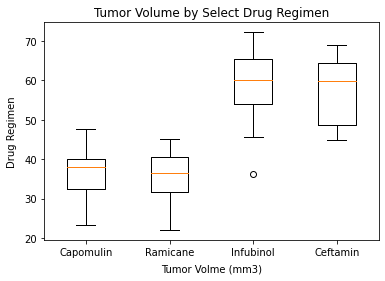

In [57]:
 # Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol)
plt.title("Tumor Volume by Select Drug Regimen")
plt.xlabel("Tumor Volme (mm3)", labelpad=7)
plt.ylabel("Drug Regimen", labelpad=7)
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

In [58]:
# Generate a line plot of tumor volume vs. time point for a SINGLE mouse treated with Capomulin
# First find a mouse
# cleaned_df.head(50)
#Mouse ID s185 was treated with Capomulin

In [59]:
#Second, make a new df just for capo
capo_df = cleaned_df.loc[cleaned_df["Mouse ID"] == "s185"]
capo_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


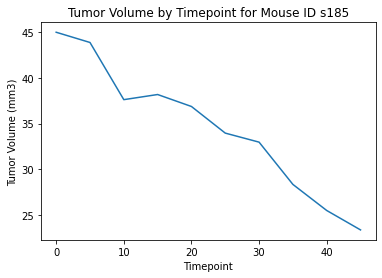

In [60]:
#Third, plot
x_axis = capo_df["Timepoint"]
y_axis = capo_df["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.title("Tumor Volume by Timepoint for Mouse ID s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [61]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# First create DF
capo2_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin"]
ATV_df = capo2_df.groupby(["Mouse ID"]).mean()
#capo2_df.head(20)
ATV_df.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


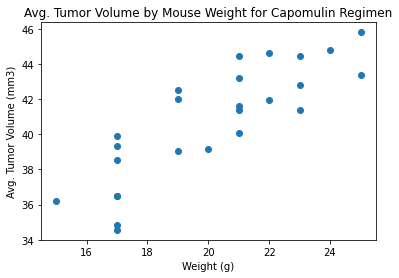

In [62]:
#Second, plot
plt.scatter(ATV_df["Weight (g)"], ATV_df["Tumor Volume (mm3)"])
plt.title("Avg. Tumor Volume by Mouse Weight for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Avg. Tumor Volume (mm3)")
plt.show()

In [63]:
# Calculate correlation coefficient and linear regression model for mouse weight and AVG tumor volume for the Capomulin regimen

In [64]:
mouse_weight = ATV_df.iloc[:,1]
avg_vol = ATV_df.iloc[:,3]
correlation = st.pearsonr(mouse_weight, avg_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


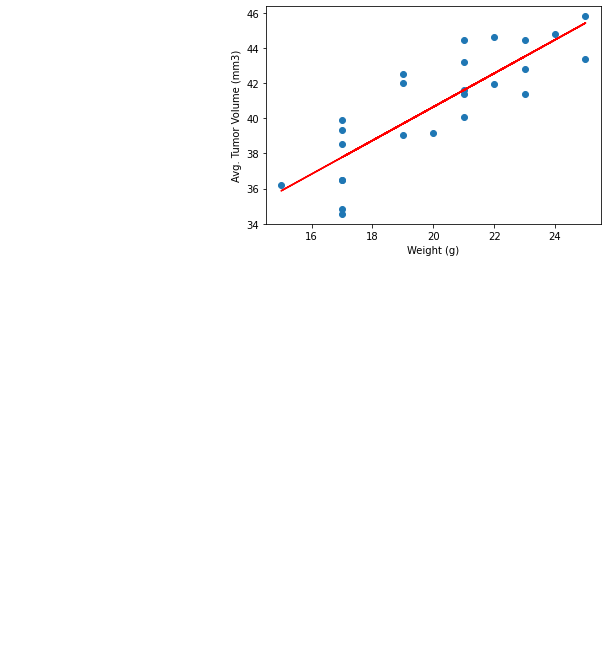

In [65]:
#x_values = mouse_weight, y_values = avg_vol
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, avg_vol)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, avg_vol)
plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Avg. Tumor Volume (mm3)")
plt.show()